In [12]:
from sklearn.preprocessing import StandardScaler
import torch
import numpy as np
scaler = StandardScaler()

#### Scale the training data ####
# store shape so we can transform it back
X = torch.randint(0,10,[4,1,10,10])
N,C,H,W = X.shape
# Reshape to 1D because StandardScaler operates on a 1D array
# tell numpy to infer shape of 1D array with '-1' argument
X = np.reshape(X, (N,-1))
X_ = scaler.fit_transform(X)
print(X_.shape)

(4, 100)


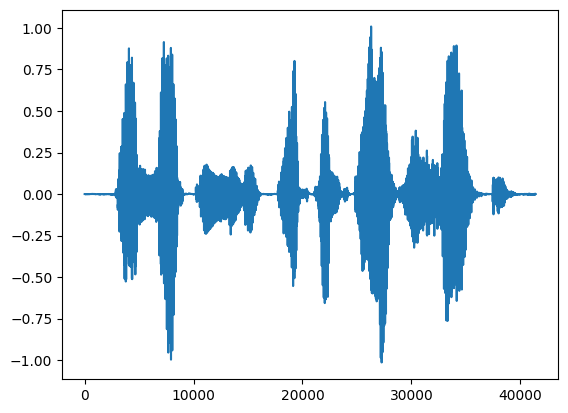

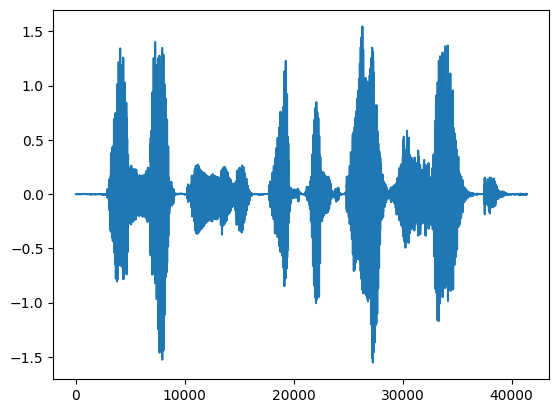

In [1]:
from preprocess.augment import dyn_change
import matplotlib.pyplot as plt
import librosa
wav_file = "preprocess/EmoDB/anger/03a01Wa.wav"
data, sr = librosa.load(wav_file)
plt.plot(data)
plt.show()
data_, method = dyn_change(data)
plt.plot(data_)
plt.show()

In [2]:
# from preprocess.augment import frequency_mask, time_mask
import librosa.display
mfcc = librosa.feature.mfcc(y=data, sr=sr)
# librosa.display.specshow(mfcc, y_axis="linear", x_axis="time")
# mfcc_ = frequency_mask(mfcc, p=0.1)
# mfcc__ = time_mask(mfcc, p=0.4)
# librosa.display.specshow(mfcc__, y_axis="linear", x_axis="time")

In [3]:
from sparse_image_warp import specaug
import torch
mfcc1 = torch.from_numpy(mfcc)
mfcc2 = specaug(mfcc1, 5,10,50)
librosa.display.specshow(mfcc2, y_axis="linear", x_axis="time")

d:\python3_7\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


RuntimeError: linalg.solve: A must be batches of square matrices, but they are 2 by 8 matrices

(128, 81)


D:\graduate_code\Model4\sparse_image_warp.py:295: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha = torch.tensor((queries - floor), dtype=grid_type, device=grid_device)


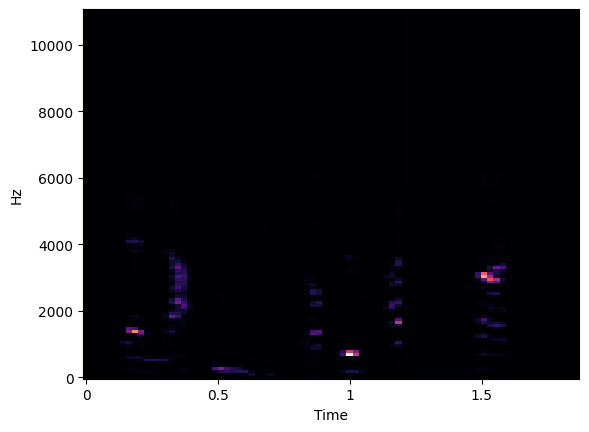

In [7]:
import librosa
import torch
import librosa.display
from sparse_image_warp import specaug
wav_file = "preprocess/EmoDB/anger/03a01Wa.wav"
data, sr = librosa.load(wav_file)
spec = librosa.feature.melspectrogram(y=data, sr=sr)
# librosa.display.specshow(spec, y_axis="linear", x_axis="time")
print(spec.shape)
spec_a = specaug(torch.from_numpy(spec), W=50, F=20, T=100)

librosa.display.specshow(spec_a.numpy(), y_axis="linear", x_axis="time")